In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("hotel_bookings(1).csv")
df = pd.read_csv("hotel_bookings.csv")

# Check if the data is correct
print(df.head())  # View the first few lines of data
print(df.info())  # Check data types and missing values

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0      342.0             2015.0               July   
1  Resort Hotel          0.0      737.0             2015.0               July   
2  Resort Hotel          0.0        7.0             2015.0               July   
3  Resort Hotel          0.0       13.0             2015.0               July   
4  Resort Hotel          0.0       14.0             2015.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                      27.0                        1.0   
1                      27.0                        1.0   
2                      27.0                        1.0   
3                      27.0                        1.0   
4                      27.0                        1.0   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [3]:
# Select the relevant lists
df = df[["hotel", "arrival_date_month", "is_canceled"]]

# Calculate the total number of bookings per month
total_bookings = df.groupby(["arrival_date_month", "hotel"]).size().reset_index(name="booking_count")

# Calculate the number of cancellations per month
cancelled_bookings = df[df["is_canceled"] == 1].groupby(["arrival_date_month", "hotel"]).size().reset_index(name="canceled_count")

# Merge data
data = total_bookings.merge(cancelled_bookings, on=["arrival_date_month", "hotel"], how="left")
data["canceled_count"] = data["canceled_count"].fillna(0)
data["cancellation_rate"] = data["canceled_count"] / data["booking_count"]

# Make sure the months are in the correct order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data["arrival_date_month"] = pd.Categorical(data["arrival_date_month"], categories=month_order, ordered=True)
data = data.sort_values("arrival_date_month")

# Check the data again
print(data.head())

   arrival_date_month         hotel  booking_count  canceled_count  \
8             January    City Hotel           3736            1482   
9             January  Resort Hotel           2191             323   
6            February    City Hotel           4965            1901   
7            February  Resort Hotel           3095             787   
15              March  Resort Hotel           3326             757   

    cancellation_rate  
8            0.396681  
9            0.147421  
6            0.382880  
7            0.254281  
15           0.227601  


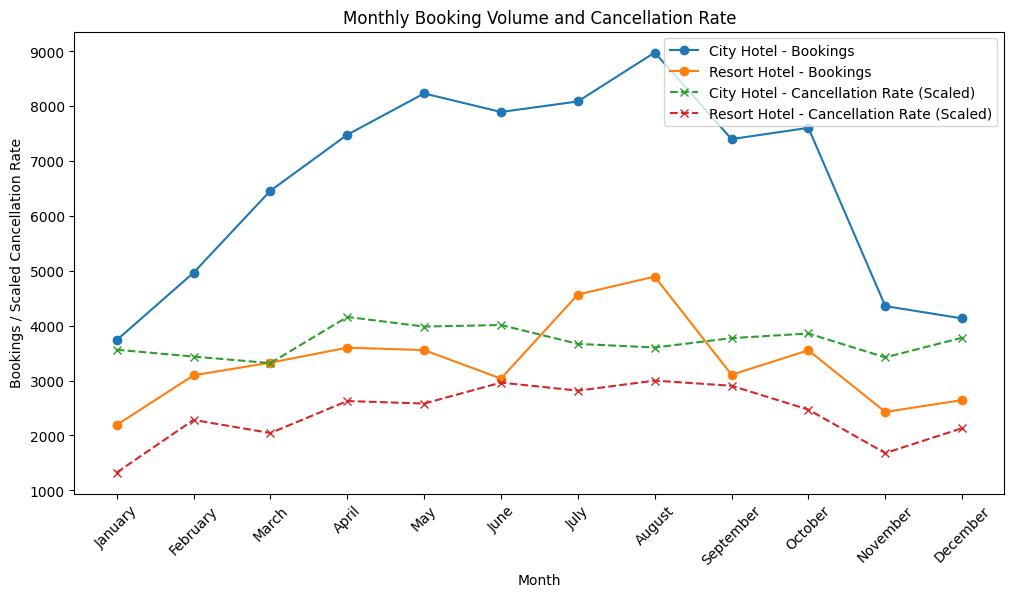

In [4]:
plt.figure(figsize=(12,6))

# Draw the number of bookings for different hotel types
for hotel in data["hotel"].unique():
    subset = data[data["hotel"] == hotel]
    plt.plot(subset["arrival_date_month"], subset["booking_count"], marker="o", label=f"{hotel} - Bookings")

# Draw cancellation rate
for hotel in data["hotel"].unique():
    subset = data[data["hotel"] == hotel]
    plt.plot(subset["arrival_date_month"], subset["cancellation_rate"] * max(data["booking_count"]), linestyle="dashed", marker="x", label=f"{hotel} - Cancellation Rate (Scaled)")

plt.xlabel("Month")
plt.ylabel("Bookings / Scaled Cancellation Rate")
plt.title("Monthly Booking Volume and Cancellation Rate")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Mini Report:
My business question is which months have the highest booking volumes and cancellation rates, and how do these trends differ between City Hotels and Resort Hotels? This question is important for hotel managers and tourists because it identifies peak booking months, allowing hotels to optimize pricing strategies, offering higher rates during high demand periods and discounts during low seasons. Hotels can design targeted promotions to encourage bookings during low demand months. Understanding cancellation trends can help implement better cancellation policies to minimize revenue losses. To explore this question, I use arrival date month, hotel type and cancellation.  These data allow us to analyze both booking demand and cancellation behavior over time, distinguishing trends between City Hotels and Resort Hotels. By analyzing the data by month and hotel type, I calculated total bookings and cancellation rates, ensuring a clear comparison. My findings show that City Hotels have higher bookings in summer (June and August), while Resort Hotels peak in July. City Hotels tend to have higher cancellations in the summer, while Resort Hotels see peak bookings during the holiday season. However, some months have a significantly higher percentage of cancellations, especially at Resort Hotels.

Overall mark: 63

#### Business Question:
The business question is clearly identified and is well connected to the given dataset. Clear evidences are presented to address the question. Though findings are appropriately pointed out using the selected data, there are no implications and actionable suggestions provided. Since the question itself is straightforward to answer given data, further exploration of the data potential is limited.

<u>Good</u>

#### Data:
Three critical variables, arrival date month, hotel type and cancellation, are identified to answer the question. The rationale of choosing these variables is clearly presented. Effective data grouping and handling shows good skill in data manipulation, which is important for the further calculation based on the selected variables.

<u>Very Good</u>

#### Visualization:
A basic dotted line plot is presented for the visualization purpose, with essential elements of the title, axis labels and ticks. Legends are provided for better readability. However, the y-axis is a bit misleading. How the cancellation rate is scaled needs to be explicitly explained, otherwise the reader might be not clear how two quantities in different magnitude (booking volume and cancellation rate) can share one y-axis.

<u>Good</u>

#### Code:
The code structure is clear and easy to follow overall. However, there is a minor issue in importing the data file (you cannot use the file name "hotel_bookings(1).csv" that only exists on your machine). Necessary comments are provided.

<u>Very Good</u>